In [85]:
import tensorflow as tf
from tensorflow.keras import Sequential
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [88]:
os_path = '/content/drive/MyDrive/ProjetCV'
folders = os.listdir(os_path)
folders.sort()

dict_class = {}

for i, folder in enumerate(folders):
  dict_class[i] = folder
dict_class

{0: '.ipynb_checkpoints',
 1: 'Ace',
 2: 'Akainu',
 3: 'Brook',
 4: 'Chopper',
 5: 'Crocodile',
 6: 'Franky',
 7: 'Jinbei',
 8: 'Kurohige',
 9: 'Law',
 10: 'Luffy',
 11: 'Mihawk',
 12: 'Nami',
 13: 'Rayleigh',
 14: 'Robin',
 15: 'Sanji',
 16: 'Shanks',
 17: 'Usopp',
 18: 'Zoro'}

In [89]:
del dict_class[0]

In [97]:
dict_class

{1: 'Ace',
 2: 'Akainu',
 3: 'Brook',
 4: 'Chopper',
 5: 'Crocodile',
 6: 'Franky',
 7: 'Jinbei',
 8: 'Kurohige',
 9: 'Law',
 10: 'Luffy',
 11: 'Mihawk',
 12: 'Nami',
 13: 'Rayleigh',
 14: 'Robin',
 15: 'Sanji',
 16: 'Shanks',
 17: 'Usopp',
 18: 'Zoro'}

In [41]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
my_dir = '/content/drive/MyDrive/ProjetCV'

In [43]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(my_dir, validation_split=0.2,subset='training',seed=123, image_size=(224, 224), batch_size = 16)
test_data = tf.keras.preprocessing.image_dataset_from_directory(my_dir, validation_split=0.2, subset='validation', seed=123,image_size=(224, 224),batch_size= 16 )

Found 11737 files belonging to 18 classes.
Using 9390 files for training.
Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


In [44]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [45]:
preproc = Sequential(name = 'preproc')

preproc.add(RandomFlip("horizontal_and_vertical", input_shape=(224,224,3)))
preproc.add(RandomRotation(0.2))
preproc.add(RandomZoom(0.1))

In [46]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Normalization, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model

In [47]:
def mymodel():
  model = Sequential()

  mn_model = MobileNet(input_shape=(224,224,3), weights="imagenet",include_top=False)
  model.add(preproc)
  model.add(mn_model)

  model.add(GlobalAveragePooling2D())
  model.add(BatchNormalization())
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.4))
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(18, activation="sigmoid"))

  model.compile(
        optimizer= 'Adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

  return model

In [48]:
the_model = mymodel()
the_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preproc (Sequential)        (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                      

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
arret = EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    mode ="max",
    verbose=2,
    restore_best_weights=True
)

In [58]:
res = the_model.fit (
    train_data,
    validation_data=test_data,
    epochs=200,
    verbose=1,
)

Epoch 1/200
587/587 [==============================] - 35s 59ms/step - loss: 0.1100 - accuracy: 0.9741 - val_loss: 0.1409 - val_accuracy: 0.9710
Epoch 2/200
587/587 [==============================] - 34s 58ms/step - loss: 0.0957 - accuracy: 0.9756 - val_loss: 0.0728 - val_accuracy: 0.9795
Epoch 3/200
587/587 [==============================] - 34s 58ms/step - loss: 0.0865 - accuracy: 0.9800 - val_loss: 0.0621 - val_accuracy: 0.9851
Epoch 4/200
587/587 [==============================] - 34s 58ms/step - loss: 0.0933 - accuracy: 0.9767 - val_loss: 0.1887 - val_accuracy: 0.9629
Epoch 5/200
587/587 [==============================] - 34s 58ms/step - loss: 0.1201 - accuracy: 0.9728 - val_loss: 0.1211 - val_accuracy: 0.9774
Epoch 6/200
587/587 [==============================] - 34s 58ms/step - loss: 0.1042 - accuracy: 0.9753 - val_loss: 0.0913 - val_accuracy: 0.9808
Epoch 7/200
587/587 [==============================] - 34s 58ms/step - loss: 0.0859 - accuracy: 0.9781 - val_loss: 0.1714 - val_ac

In [66]:
the_model.save('/content/drive/MyDrive/models/op_modelV2.h5')

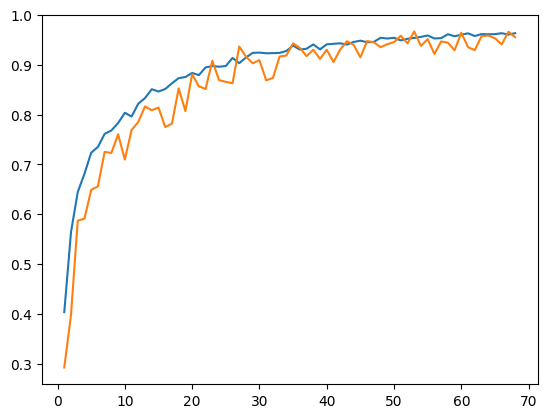

In [56]:
plt.plot(np.arange(1, 69,1), res.history['accuracy'])
plt.plot(np.arange(1, 69,1), res.history['val_accuracy'])
plt.show()

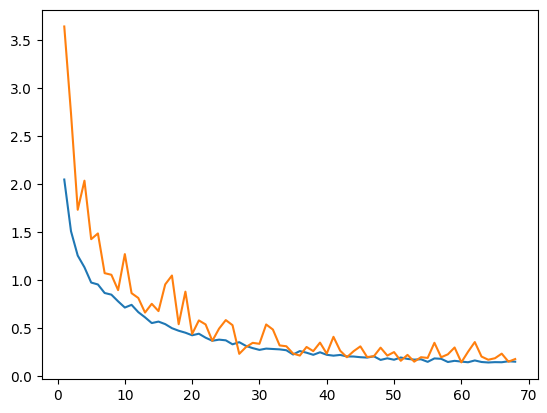

In [57]:
plt.plot(np.arange(1, 69,1), res.history['loss'])
plt.plot(np.arange(1, 69,1), res.history['val_loss'])
plt.show()

In [ ]:
#### ENSUITE AVEC BATCH PLUS PETIT 2 DENSES, PENALISATION 0.4 ET 327 ITER

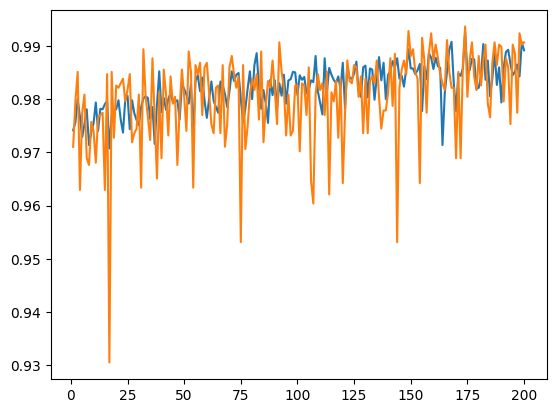

In [60]:
plt.plot(np.arange(1, 201,1), res.history['accuracy'])
plt.plot(np.arange(1, 201,1), res.history['val_accuracy'])
plt.show()

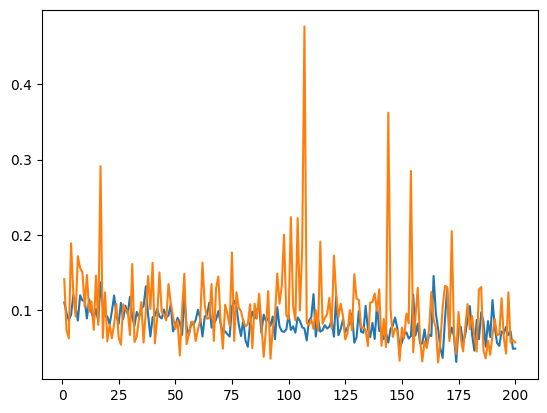

In [61]:
plt.plot(np.arange(1, 201,1), res.history['loss'])
plt.plot(np.arange(1, 201,1), res.history['val_loss'])
plt.show()

In [77]:
import cv2

In [115]:
luffy = cv2.imread('/content/drive/MyDrive/TESTOP/testluffy.png')

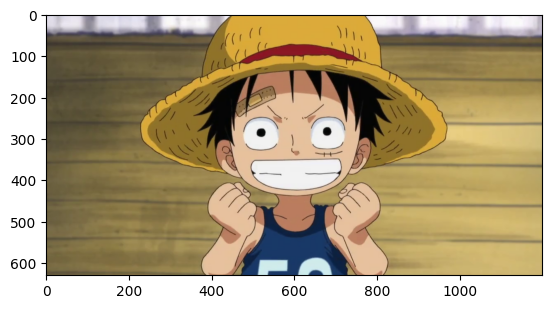

In [81]:
plt.imshow(cv2.cvtColor(luffy,cv2.COLOR_BGR2RGB))
plt.show()

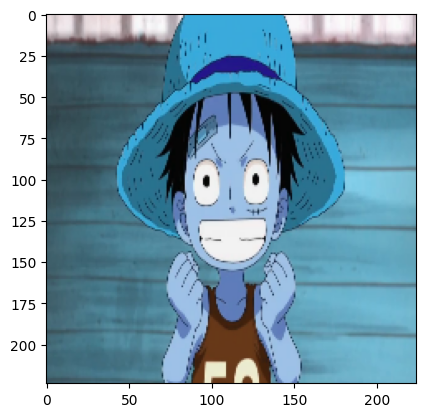

In [80]:
luffy_resize = tf.image.resize(luffy, (224, 224))
plt.imshow(luffy_resize.numpy().astype(int))
plt.show()

In [82]:
np.expand_dims(luffy_resize, 0).shape

(1, 224, 224, 3)

In [83]:
the_model.predict(np.expand_dims(luffy_resize, 0))

1/1 [==============================] - 1s 671ms/step


array([[1.2041271e-26, 3.7096920e-27, 1.1765375e-28, 5.7959856e-27,
        1.5875829e-28, 6.6495139e-28, 3.4701454e-25, 5.7254477e-26,
        1.5296558e-27, 1.1178329e-17, 6.8702038e-28, 1.7998552e-25,
        8.7308039e-25, 3.2145747e-28, 2.6412456e-26, 1.0284094e-26,
        7.1144900e-26, 1.4662382e-26]], dtype=float32)

In [114]:
def APP(path):
  img = cv2.imread(path)
  img_resize = tf.image.resize(img, (224, 224))

  prediction = the_model.predict(np.expand_dims(img_resize, 0))
  res = np.argmax(prediction)
  print("Sur cette photo c'est", dict_class[res+1])
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()
  plt.show()

1/1 [==============================] - 0s 25ms/step
Sur cette photo c'est Luffy


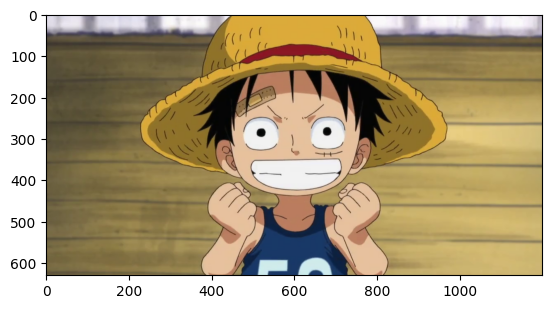

In [116]:
APP('/content/drive/MyDrive/TESTOP/testluffy.png')

1/1 [==============================] - 0s 24ms/step
Sur cette photo c'est Nami


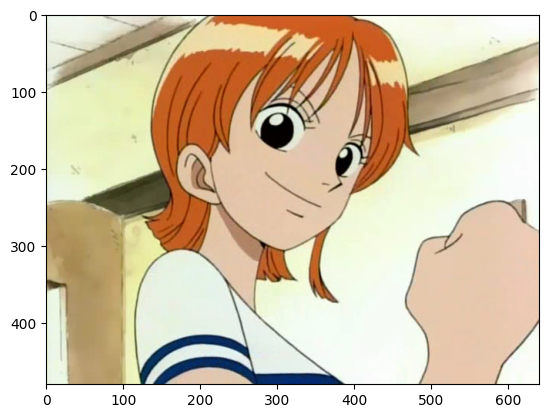

In [117]:
APP('/content/drive/MyDrive/TESTOP/testnami.png')